In [6]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix




In [7]:
#loading in all the csv files
df1 = pd.read_csv('44065_clean.csv')
df2 = pd.read_csv('44009_clean.csv')
df = df1.append(df2)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


(16651, 2)
Score: 0.9723765200420358


/Users/ishwar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


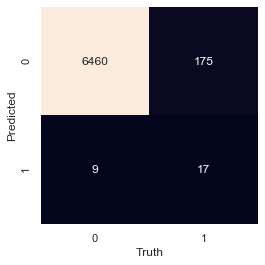

In [11]:
#https://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
def NBmodel(cols, pred):

    x_cols = np.array(df[cols].values)
    y_cols = np.array(df[pred].values)
    print(x_cols.shape)
    clf = GaussianNB()
    x_train, x_test, y_train, y_test = train_test_split(x_cols, y_cols, test_size=0.40)

    clf.fit(x_train, y_train)
    print("Score:",clf.score(x_test, y_test))
    joblib.dump(clf, 'model.pkl') #dumping the model

    pred = clf.predict(x_test)

    # Plot Confusion Matrix
    mat = confusion_matrix(pred, y_test)
    names = np.unique(pred)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    plt.show()


cols = ['pressure','windspeed']
pred = ['hurrthreat']


NBmodel(cols, pred) #calling the classifier model